<a href="https://colab.research.google.com/github/hellkirl/cs102/blob/homework06/homework06/hw6_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
install.packages("magrittr")
install.packages("dplyr")
library(magrittr)
library(dplyr) 
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [247]:
# Шаг 1.1
dataframe <- read.csv('music_genre.csv')

In [248]:
# Шаг 1.2
df <- dataframe[sample(nrow(dataframe), 20000),]

In [249]:
# Шаг 1.3
df <- df[!duplicated(df),]

In [250]:
# Шаг 1.4
df <- df[!(df$artist_name == 'empty_field'),]
df <- df[complete.cases(df),]

In [251]:
head(df)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
14806,31696,Boney James,"Stop, Look, Listen (To Your Heart)",47,0.3890,0.575,296320,0.494,0.562,B,0.0741,-12.006,Minor,0.0346,84.90899999999999,4-Apr,0.395,Jazz
11593,76289,Christian Scott aTunde Adjuah,Sunrise in Beijing,34,0.0763,0.341,304238,0.824,0.312,F#,0.0791,-5.443,Major,0.0610,103.079,4-Apr,0.351,Jazz
26229,36877,Donnie Trumpet & The Social Experiment,Wanna Be Cool,50,0.2390,0.663,207560,0.611,0.000,C,0.1810,-8.287,Major,0.3010,116.947,4-Apr,0.337,Rap
6542,75322,Joe Hisaishi,Island Song,13,0.9070,0.504,221240,0.206,0.895,C,0.1390,-19.091,Major,0.0355,99.882,3-Apr,0.589,Anime
30597,63338,J. Paul Jr And The Zydeco Nubreeds,She's So Lovely,23,0.0640,0.891,221613,0.440,0.000,D,0.0649,-9.384,Major,0.1650,149.009,4-Apr,0.888,Blues
24537,40005,Upchurch,Tennessee Dreamin,43,0.4790,0.680,157024,0.695,0.000,F#,0.4310,-8.138,Minor,0.0415,140.067,4-Apr,0.347,Country


In [252]:
nrow(df)

[1] 19025

# Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [253]:
# Шаг 2.1 - Доля каждого жанра
genre_percentage <- table(df$music_genre) / length(df$music_genre) * 100
genre_percentage_df <- data.frame(Percentage = genre_percentage)
colnames(genre_percentage_df) <- c('Genre', 'Percentage')
print(genre_percentage_df)

         Genre Percentage
1  Alternative  10.007884
2        Anime   9.855453
3        Blues  10.023653
4    Classical   9.939553
5      Country  10.065703
6   Electronic  10.107753
7      Hip-Hop  10.260184
8         Jazz  10.202365
9          Rap   9.645204
10        Rock   9.892247


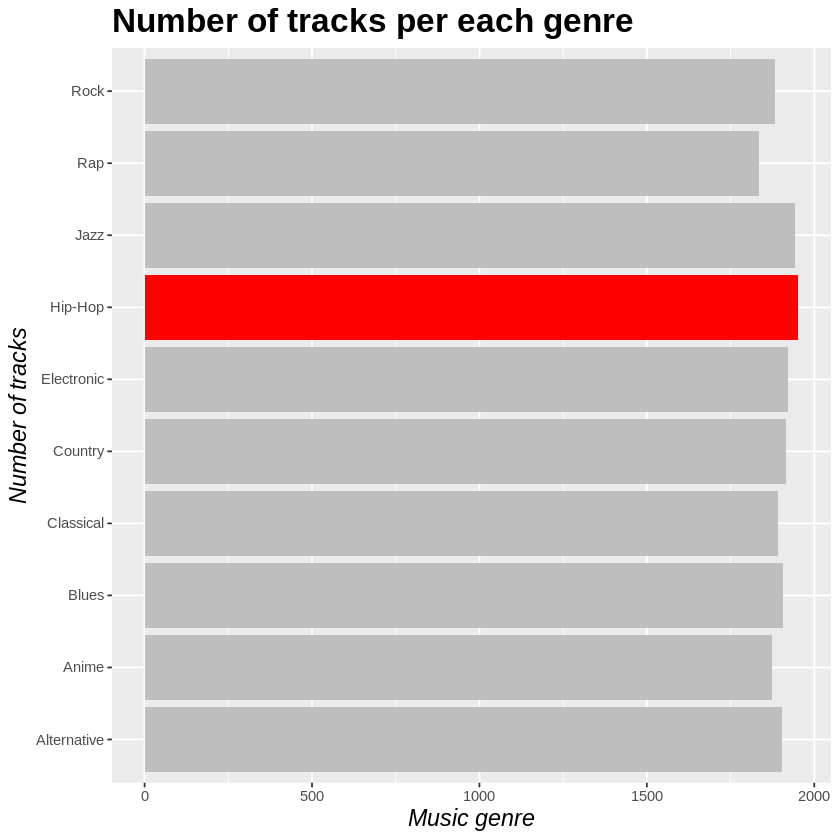

In [254]:
# Шаг 2.2 - Распределение количества треков по жанрам
genres <- names(table(df$music_genre))
values <- as.vector(table(df$music_genre))
df_genre_val <- data.frame(Music_genre = genres, Values = values)
cc <- ifelse(values < max(values), "grey", "red")
track_num_per_genre <- ggplot(df_genre_val, aes(x=Music_genre, y=Values)) + 
  geom_bar(stat = "identity", fill=cc) + 
  coord_flip() +
  ggtitle("Number of tracks per each genre") +
  xlab("Number of tracks") +
  ylab("Music genre") +
  theme(
plot.title = element_text(color="black", size=20, face="bold"),
axis.title.x = element_text(color="black", size=14, face="italic"),
axis.title.y = element_text(color="black", size=14, face="italic")
)

track_num_per_genre

In [255]:
# Шаг 2.3 - Самый танцевальный жанр
danceability_percentage <- select(df, c("music_genre", "danceability"))
danceable_genre <- danceability_percentage %>%
  group_by(music_genre) %>%
  summarise(danceability = mean(danceability))
danceable_genre[which.max(danceable_genre$danceability),]

music_genre,danceability
<chr>,<dbl>
Hip-Hop,0.7180169


In [256]:
# Шаг 2.4 - Тональность в жанрах
genre_mode <- df %>%
  select(music_genre, mode) %>%
  count(music_genre, mode)
genre_mode

music_genre,mode,n
<chr>,<chr>,<int>
Alternative,Major,1241
Alternative,Minor,663
Anime,Major,1152
Anime,Minor,723
Blues,Major,1377
Blues,Minor,530
Classical,Major,1262
Classical,Minor,629
Country,Major,1677


# Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [257]:
# Шаг 3.1 - Максимальное и минимальное количество треков
max_min_artist <- df %>% 
  group_by(artist_name) %>% 
  summarize(Value = n()) %>% 
  arrange(Value) %>% 
  ungroup() 

max_min_artist %>% slice(c(1, n()))

artist_name,Value
<chr>,<int>
$NOT,1
Nobuo Uematsu,162


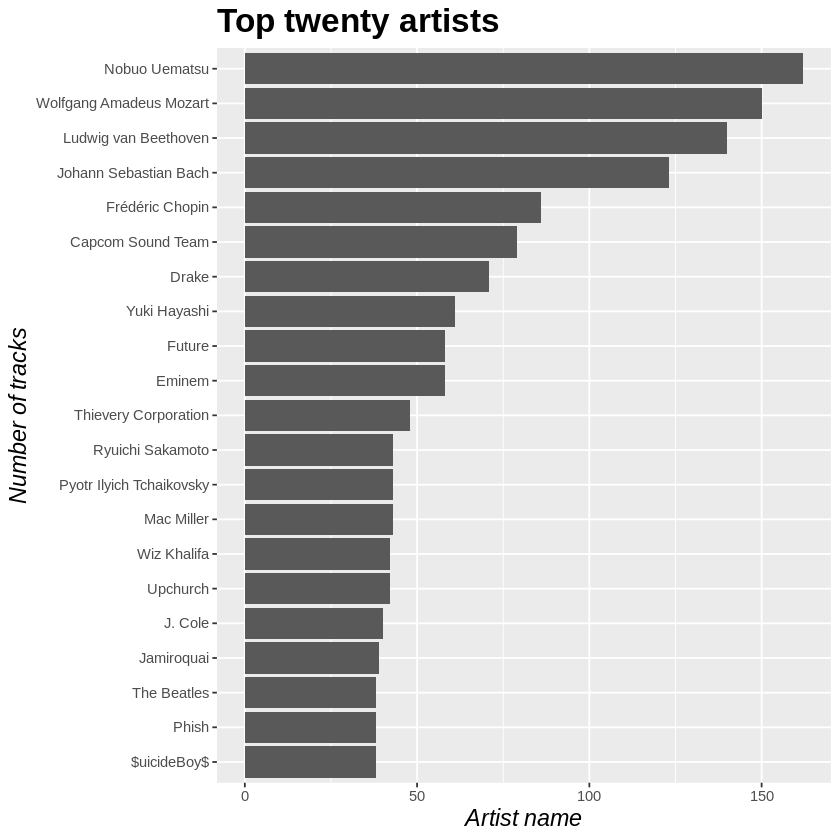

In [258]:
# Шаг 3.2 - Столбиковая диаграмма топ-20 артистов
top_twenty_art <- max_min_artist %>% 
  arrange() %>%
  slice_max(Value, n = 20)

top_twenty_bar <- ggplot(top_twenty_art) +
  geom_bar(stat="identity", aes(x=reorder(artist_name, Value), y=Value)) +
  ggtitle("Top twenty artists") +
  xlab("Number of tracks") +
  ylab("Artist name") +
  theme(
  plot.title = element_text(color="black", size=20, face="bold"),
  axis.title.x = element_text(color="black", size=14, face="italic"),
  axis.title.y = element_text(color="black", size=14, face="italic")
  ) +
  coord_flip()

top_twenty_bar

# Задание 4
1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [259]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [260]:
library(corrplot)

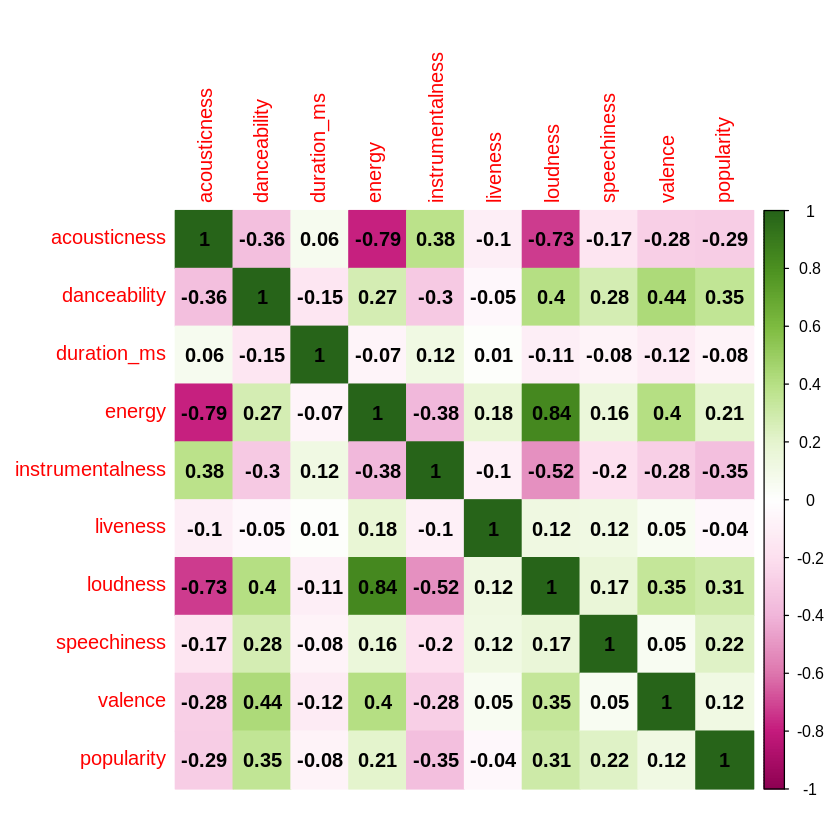

In [261]:
# Шаг 4.1 - Корреляционная матрица характеристик
features <- df[, c("acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity")] %>%
  select_if(~ !is.character(.))
cor_features <- cor(features)
corrplot(cor_features, addCoef.col = 'black', method="color", col = COL2('PiYG'))

In [262]:
# Шаг 4.2 - Корреляция между популярностью и длиной трека
corr_popularity_len <- data.frame(length=nchar(df$track_name), popularity=df$popularity) %>% cor()
corr_popularity_len

,length,popularity
length,1.0000000,-0.2178957
popularity,-0.2178957,1.0000000


# Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

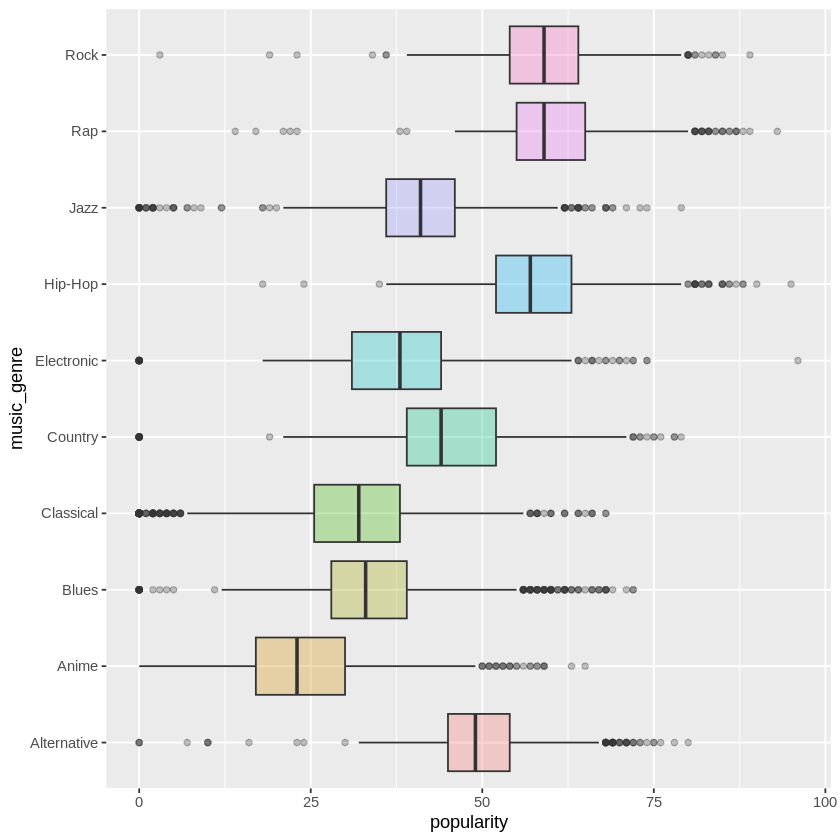

In [263]:
# Шаг 5 - Ящиковая диаграмма отношения популярности треков к жанру
popularity_genre <- df[, c("popularity", "music_genre")]

popularity_genre_plot <- ggplot(popularity_genre, aes(x=popularity, y=music_genre, fill=music_genre)) + 
  geom_boxplot(alpha=0.3) +
  theme(legend.position="none")
popularity_genre_plot

# Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого 
популярного исполнителя. Диаграмма должна быть одна.

In [264]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [265]:
library(scales)

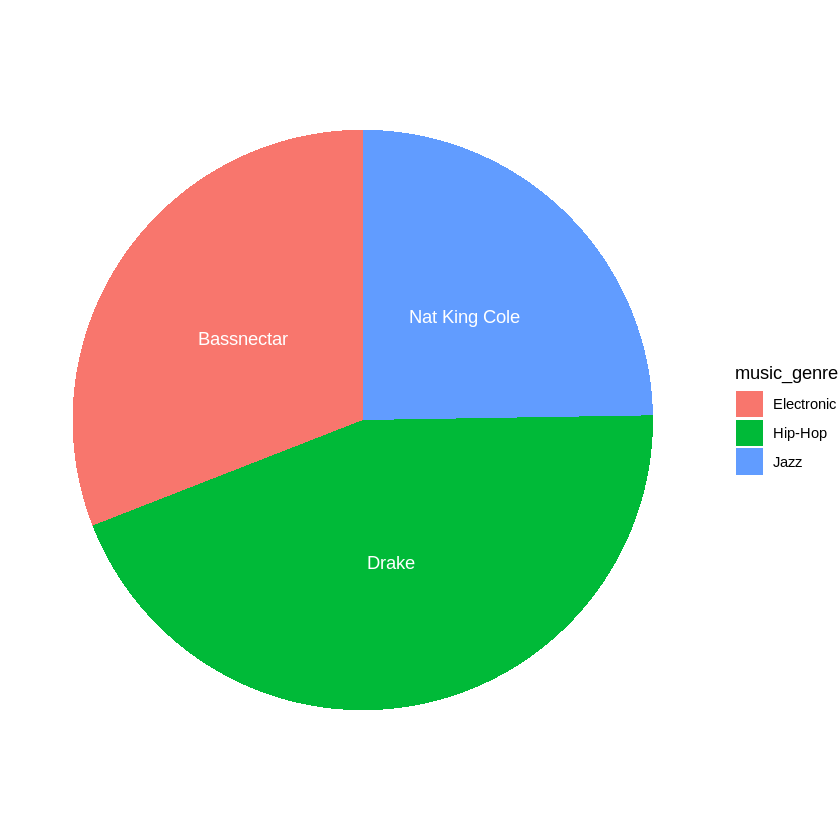

In [266]:
# Шаг 6 - Круговая диаграмма с группировкой самого популярного исполнителя
popular_genre <- names(sort(table(df$music_genre), decreasing = TRUE))[1:3]
list_true_false <- df$music_genre %in% popular_genre

genres_artists <- subset(df, select = c("artist_name", "music_genre"))
genres_artists$count <- list_true_false

genres_artists_count <- aggregate(count ~ artist_name + music_genre, data = genres_artists, FUN = sum)
genres_artists_count <- genres_artists_count[order(-genres_artists_count$count), ]

genres_artists_count <- genres_artists_count[!duplicated(genres_artists_count$music_genre), ]

genres_artists_count <- head(genres_artists_count, n=3)

val <- genres_artists_count$count
art_name <- genres_artists_count$artist_name
genre_name <- genres_artists_count$music_genre

ggplot(data=genres_artists_count, aes(x="", y=count, fill=music_genre))+
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +   
  geom_text(aes(y=count, label=artist_name), position=position_stack(vjust = 0.5), color = "white") +
  theme_void()

# Задание 7
На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.


In [267]:
# Шаг 7 - Столбиковая диаграмма самого популярного и непопулярного жанров
popularity_rate <- list()
for (genre in genres) {p_rate <- append(popularity_rate, mean(subset(df, music_genre == genre)$popularity))}

nested_list_popularitry = list(genre = genres, popularity = p_rate)
df_p <- as.data.frame(do.call(cbind, nested_list_popularitry))
df_p <- transform(df_p, genre = as.character(genre), popularity = as.numeric(popularity))

min_genre <- df_p$genre[df_p$popularity == min(df_p$popularity)]
max_genre <- df_p$genre[df_p$popularity == max(df_p$popularity)]

minmax_cols <- c("acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

In [268]:
df_min <- df[df$music_genre == min_genre, ]
df_min <- df_min[, minmax_cols]
min_means <- colMeans(df_min, na.rm = TRUE)

df_max <- df[df$music_genre == max_genre, ]
df_max <- df_max[, minmax_cols]
max_means <- colMeans(df_max, na.rm = TRUE)

minmax_cols

Warning message in df$music_genre == min_genre:
“longer object length is not a multiple of shorter object length”
Warning message in df$music_genre == max_genre:
“longer object length is not a multiple of shorter object length”


[1] "acousticness"     "danceability"     "energy"           "instrumentalness"
[5] "liveness"         "loudness"         "speechiness"      "valence"

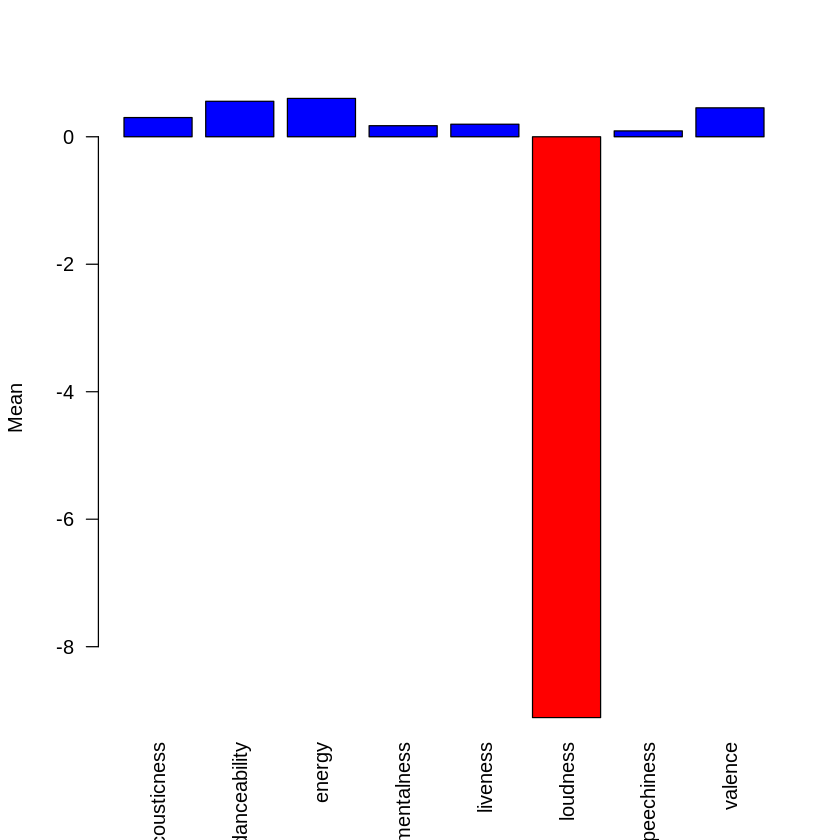

In [269]:
# Самый непопулярный жанр
barplot(min_means, ylab="Mean", col=ifelse(unname(data.matrix(sapply(min_means, as.numeric))) < 0, "red", "blue"), 
las=2)

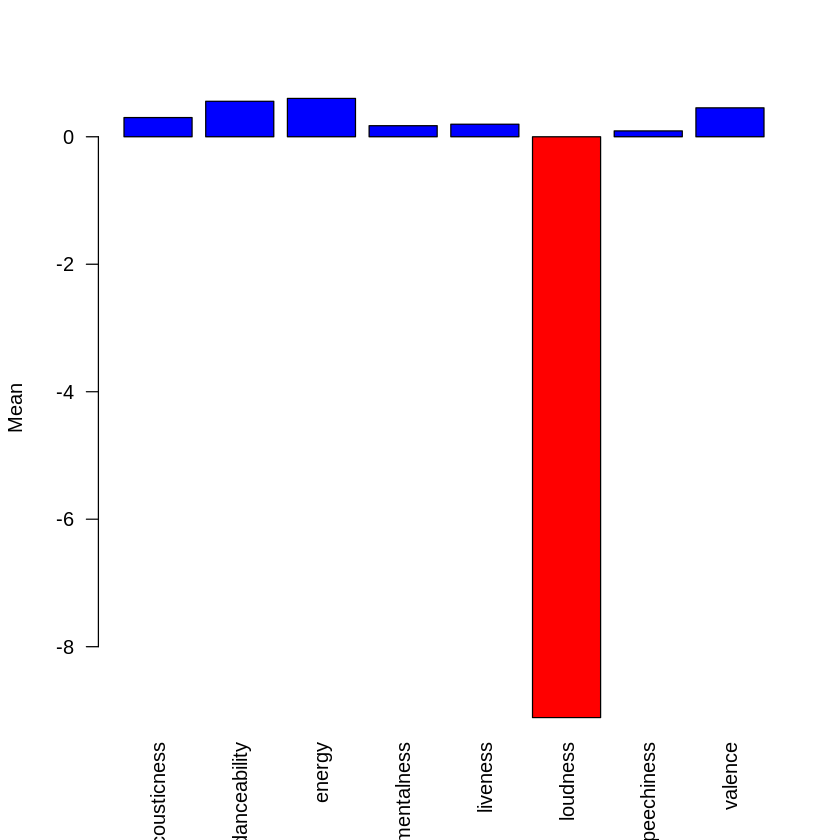

In [270]:
# Самый популярный жанр
barplot(max_means, ylab="Mean", col=ifelse(unname(data.matrix(sapply(max_means, as.numeric))) < 0, "red", "blue"), las=2)


# Задание 8
1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [271]:
# Шаг 8.1 - Категориальный столбец длительность_трека
df$track_length <- ifelse(df$duration_ms / 1000 / 60 <= 3, "короткая", ifelse(df$duration_ms / 1000 / 60 > 5, "длинная", "средняя"))
df$track_length <- gsub("0", "средняя", df$track_length)
head(df)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,track_length
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
14806,31696,Boney James,"Stop, Look, Listen (To Your Heart)",47,0.3890,0.575,296320,0.494,0.562,B,0.0741,-12.006,Minor,0.0346,84.90899999999999,4-Apr,0.395,Jazz,средняя
11593,76289,Christian Scott aTunde Adjuah,Sunrise in Beijing,34,0.0763,0.341,304238,0.824,0.312,F#,0.0791,-5.443,Major,0.0610,103.079,4-Apr,0.351,Jazz,длинная
26229,36877,Donnie Trumpet & The Social Experiment,Wanna Be Cool,50,0.2390,0.663,207560,0.611,0.000,C,0.1810,-8.287,Major,0.3010,116.947,4-Apr,0.337,Rap,средняя
6542,75322,Joe Hisaishi,Island Song,13,0.9070,0.504,221240,0.206,0.895,C,0.1390,-19.091,Major,0.0355,99.882,3-Apr,0.589,Anime,средняя
30597,63338,J. Paul Jr And The Zydeco Nubreeds,She's So Lovely,23,0.0640,0.891,221613,0.440,0.000,D,0.0649,-9.384,Major,0.1650,149.009,4-Apr,0.888,Blues,средняя
24537,40005,Upchurch,Tennessee Dreamin,43,0.4790,0.680,157024,0.695,0.000,F#,0.4310,-8.138,Minor,0.0415,140.067,4-Apr,0.347,Country,короткая


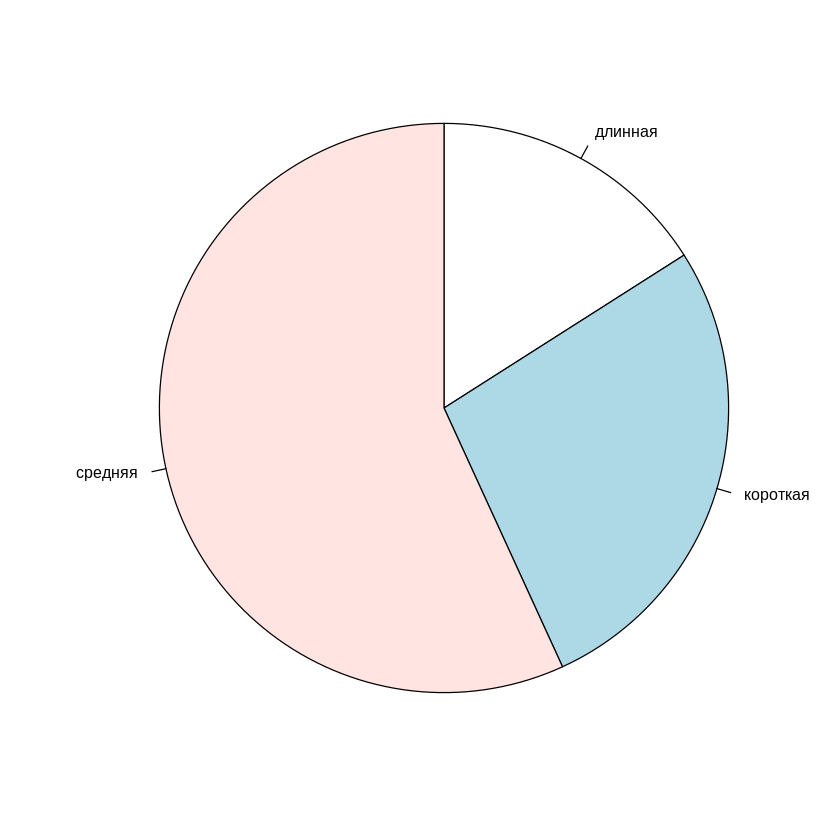

In [272]:
# Шаг 8.3 - Численное соотношение треков разной длительности 
track_len_labels <- names(table(df$track_length))

suppressWarnings({
pie_chart <- pie(table(df$track_length),
                 labels = track_len_labels,
                 cex = 0.8,
                 clockwise = TRUE,
                 init.angle = 90,
                 angle = 45,
                 radius = 1,
                 labels.r = 0.7)
})